# Проект: Исследование стартапов

- Автор: Амелькин Павел
- Дата: 28.08.2025

## Введение

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.
Исследование на этом наборе датасетов уже пытались проводить внутренними силами, но собственных аналитиков у компании нет и для решения задачи пригласили аутсорс-специалистов. Данные неполны, поэтому заказчик, кроме ответа на некоторые интересующие его вопросы, просит аккуратно относиться к получаемым в процессе исследования значениям показателей и выводам и стараться оценивать их на возможные искажения.

## Цели и задачи проекта

**Цель**: Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

**Задачи**:

1. Загрузить данные и познакомиться с содержанием
2. Провести предобработку данных
3. Провести исследовательский анализ данных
4. Сформулировать вывод

## Описание данных

**acquisition.csv** - содержит информацию о покупках одними компаниями других компаний:


`id` — идентификатор покупки.

`acquiring_company_id` — идентификатор покупающей компании.

`acquired_company_id` — идентификатор покупаемой компании.

`term_code` — варианты расчёта.

`price_amount` — сумма сделки.

`acquired_at` — дата сделки.


**company_and_rounds.csv** - содержит информацию о компаниях и раундах финансирования:

`company ID` — идентификатор компании.

`name` — название компании.

`category code` — категория области деятельности компании.

`status` — статус компании.

`founded at` — дата инвестирования.

`closed at` — дата закрытия компании.

`domain` — официальный сайт компании.

`network username` — ник компании в сети.

`country code` — код страны компании.

`investment rounds` — число инвестиционных раундов.

`funding rounds` — число раундов финансирования.

`funding total` — сумма финансирования.

`milestones` — вехи финансирования.

`funding round id` — идентификатор этапа финансирования.

`company id` — идентификатор компании.

`funded at` — дата финансирования.

`funding round type` — тип финансирования.

`raised amount` — сумма финансирования.

`pre money valuation` — предварительная денежная оценка.

`participants` — число участников.

`is first round` — является ли раунд первым.

`is last round` — является раунд последним.

**people.csv** - содержит информацию о сотрудниках:

`id` — идентификатор сотрудника.

`first_name` — имя сотрудника.

`last_name` — фамилия сотрудника.

`company_id` — идентификатор компании.

`network_username` — ник в социальных сетях.

**education.csv** - содержит информацию об образовании сотрудника:

`id` — идентификатор записи об образовании.

`person_id` — идентификатор работника.

`instituition` — название учебного заведения.

`graduated_at` — дата получения образования.

**degrees.csv** - содержит информацию о типе образования сотрудника:

`id` — идентификатор записи.

`object_id` — идентификатор сотрудника.

`degree_type` — тип образования.

`subject` — специальность.

**fund.csv** - содержит информацию о фондах:

`id` — идентификатор фонда.

`name` — название фонда.

`category_code` — категория области деятельности компании.

`founded_at` — дата создания фонда.

`domain` — сайт фонда.

`network_username` — ник фонда в сети.

`country_code` — код страны фонда.

`investment_rounds` — число инвестиционных раундов.

`invested_companies` — число профинансированных компаний.

`milestones` — вехи финансирования.

**investment.csv** - содержит информацию о раундах инвестирования:

`id` — идентификатор этапа инвестирования.

`funding_round_id` — идентификатор раунда инвестирования.

`company_id` — идентификатор компании.

`funding_round_type` — тип финансирования.

`fund_id` — идентификатор фонда.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


### 1.1. Вывод общей информации, исправление названия столбцов для каждого из датасетов.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

!pip install matplotlib-venn -q
from matplotlib_venn import venn2

In [2]:
!gdown https://drive.google.com/uc?id=1BV8GpMb-S1PzV_DXmi25zU1zYts49VMN -O acquisition.csv
!gdown https://drive.google.com/uc?id=1W_8iVq-EFt-T6G-cov6bzM93lQKF9szX -O company_and_rounds.csv
!gdown https://drive.google.com/uc?id=1m_5-PzhyIoSDPqvjBSyY66hbMd-m7641 -O people.csv
!gdown https://drive.google.com/uc?id=1JxSOvxWXeu67zAreSJyB-ZW0HIUuBRuP -O education.csv
!gdown https://drive.google.com/uc?id=1OApUatRnwVRx0uc9qE1gqOum5ysuVWbC -O degrees.csv
!gdown https://drive.google.com/uc?id=12ChcczlbZ9kT-KOX6hYq8nza-IzNAlds -O fund.csv
!gdown https://drive.google.com/uc?id=1Q-SwqeY2rC05oRFInENVmWJ_LDxdozMa -O investment.csv

Downloading...
From: https://drive.google.com/uc?id=1BV8GpMb-S1PzV_DXmi25zU1zYts49VMN
To: /content/acquisition.csv
100% 363k/363k [00:00<00:00, 64.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1W_8iVq-EFt-T6G-cov6bzM93lQKF9szX
To: /content/company_and_rounds.csv
100% 24.1M/24.1M [00:00<00:00, 49.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1m_5-PzhyIoSDPqvjBSyY66hbMd-m7641
To: /content/people.csv
100% 7.29M/7.29M [00:00<00:00, 49.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JxSOvxWXeu67zAreSJyB-ZW0HIUuBRuP
To: /content/education.csv
100% 5.77M/5.77M [00:00<00:00, 23.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OApUatRnwVRx0uc9qE1gqOum5ysuVWbC
To: /content/degrees.csv
100% 4.50M/4.50M [00:00<00:00, 35.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=12ChcczlbZ9kT-KOX6hYq8nza-IzNAlds
To: /content/fund.csv
100% 676k/676k [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Q-SwqeY2rC05oRFInENVmWJ_LDx

In [3]:
acquisition = pd.read_csv('acquisition.csv', index_col=0)
company_and_rounds = pd.read_csv('company_and_rounds.csv', index_col=0)
people = pd.read_csv('people.csv', index_col=0)
education = pd.read_csv('education.csv', index_col=0)
degrees = pd.read_csv('degrees.csv', index_col=0)
fund = pd.read_csv('fund.csv', index_col=0)
investment = pd.read_csv('investment.csv', index_col=0)

In [4]:
for df in [acquisition, company_and_rounds, people, education, degrees, fund, investment]:
  display(df.head(3))

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01


,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0


,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4


In [5]:
for df in [acquisition, company_and_rounds, people, education, degrees, fund, investment]:
  print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
Index: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 514.4+ KB
None 

<class 'pandas.core.frame.DataFrame'>
Index: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at

In [6]:
(pd.DataFrame({'Кол-во пропусков': acquisition.isnull().sum(), 'Доля пропусков': acquisition.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
term_code,7576,80.535771
acquired_at,29,0.308281
acquiring_company_id,0,0.000000
id,0,0.000000
acquired_company_id,0,0.000000
price_amount,0,0.000000


In [7]:
(pd.DataFrame({'Кол-во пропусков': company_and_rounds.isnull().sum(), 'Доля пропусков': company_and_rounds.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
closed at,214325,98.416248
funded at,165094,75.809784
is first round,164846,75.695905
participants,164846,75.695905
funding round id,164846,75.695905
raised amount,164846,75.695905
is last round,164846,75.695905
funding round type,164846,75.695905
company id,164846,75.695905
pre money valuation,164846,75.695905


In [8]:
(pd.DataFrame({'Кол-во пропусков': people.isnull().sum(), 'Доля пропусков': people.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
company_id,192094,84.731528
network_username,187842,82.855996
first_name,9,0.003970
last_name,4,0.001764
id,0,0.000000


In [9]:
(pd.DataFrame({'Кол-во пропусков': education.isnull().sum(), 'Доля пропусков': education.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
graduated_at,51556,47.035854
instituition,55,0.050178
person_id,0,0.000000
id,0,0.000000


In [10]:
(pd.DataFrame({'Кол-во пропусков': degrees.isnull().sum(), 'Доля пропусков': degrees.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
subject,28312,25.829760
degree_type,11221,10.237205
object_id,0,0.000000
id,0,0.000000


In [11]:
(pd.DataFrame({'Кол-во пропусков': fund.isnull().sum(), 'Доля пропусков': fund.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
network_username,9503,81.556814
founded_at,7047,60.478888
country_code,4599,39.469619
domain,4290,36.817714
name,3,0.025747
id,0,0.000000
investment_rounds,0,0.000000
invested_companies,0,0.000000
milestones,0,0.000000


In [12]:
(pd.DataFrame({'Кол-во пропусков': investment.isnull().sum(), 'Доля пропусков': investment.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

,Кол-во пропусков,Доля пропусков
id,0,0.000000
funding_round_id,0,0.000000
company_id,0,0.000000
fund_id,0,0.000000


---

### Промежуточный вывод

После первичного знакомства с данными, можно отметить следующие особенности:

`acquisition` - состоит из 9407 строк и 6 столбцов. Информация в датасете соответствует описанию. Столбец `acquired_at` нужно привести к типу данных datetime. Названия столбцов корректные.

Пропуски:

- term_code - 80%

- acquired_at - 3%

`company_and_rounds` - состоит из 217774 строк и 22 столбцов. Информация в датасете соответствует описанию. Все числовые столбцы нужно привести к типу данных Int64, а столбцы `founded_at`, `closed_at`, `funded_at` к datetime. Названия столбцов нужно привести к стилю snake case. Есть повторяющийся столбец `company ID` и `company id`.

Пропуски содержатся во всех столбцах. От 1 до 98%.

`people` - состоит из 226709 строк и 5 столбцов. Информация в датасете соответствует описанию. Столбец `company_id` нужно привести к типу данных Int64. Названия столбцов корректные.

Пропуски:

- company_id - 84%

- network_username - 82%

- first_name, last_name, id - < 1%

`education` - состоит из 109610 строк и 4 столбцов. Информация в датасете соответствует описанию. Столбец `graduated_at` нужно привести к типу данных datetime. Названия столбцов корректные.

Пропуски:

- graduated_at - 47%

- instituition - < 1%

`degrees` - состоит из 109610 строк и 5 столбцов. Информация в датасете соответствует описанию. Названия столбцов корректные.

Пропуски:

- subject - 25%

- degree_type - 10%

`fund` - состоит из 11652 строк и 9 столбцов. Информация в датасете соответствует описанию. Названия столбцов корректные.

Пропуски:

- network_username - 81%
- founded_at - 60%
- country_code - 39%
- domain - 36%
- name - < 1%

`investment` - состоит из 61403 строк и 4 столбцов. Информация в датасете соответствует описанию. Названия столбцов корректные.

Пропуски отсутствуют.

### 1.2. Смена типов и анализ пропусков

- Обработка типов данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оценка полноты данных — предварительный вывод о данных для решения задач проекта.

In [13]:
company_and_rounds.columns = company_and_rounds.columns.str.strip().str.replace(r'\s+', '_', regex=True)

In [14]:
def process_to_datetime(column):
    """
    Функция, которая преобразует столбцы с '_at' в datetime.
    """
    if '_at' in column.name:
        return pd.to_datetime(column)
    return column


def process_to_int(column):
    """
    Функция, которая преобразует столбцы с float64 в Int64.
    """
    if column.dtype == 'float64':
        return column.astype('Int64')
    return column


def process_datasets(dataset_dict, column_processor):
    """
    Функция, которая проходит по каждому датасету в словаре и каждому столбцу,
    применяя к ним функцию column_processor.
    """
    for dataset_name, dataset in dataset_dict.items():
        for column_name in dataset.columns:
            dataset[column_name] = column_processor(dataset[column_name])
    return dataset_dict


dataset_dict = {
    'acquisition': acquisition,
    'company_and_rounds': company_and_rounds,
    'education': education,
    'people': people
}

processed_datasets = process_datasets(dataset_dict, process_to_datetime)
processed_datasets = process_datasets(dataset_dict, process_to_int)

---

### Промежуточный вывод

`acquisition`:

Столбец `acquired_at` был приведен к типу данных datetime.

`company_and_rounds`:

Столбцы были приведены к единому стилю snake case. Все числовые столбцы были приведены к типу данных Int64, а столбцы `founded_at`, `closed_at`, `funded_at` к datetime.

`people`:

Столбец `company_id` был приведен к типу данных Int64.

`education`:

Столбец `graduated_at` был приведен к типу данных datetime.

`degrees`:

Без изменений.

`fund`:

Без изменений.

`investment`:

Без изменений.

Полнота данных соответствует тому, чтобы выполнить задачи проекта, однако у более половины столбцов в таблице `company_and_rounds` содержится больше 50% пропусков. С ним стоит работать аккуратно и сохранять как можно больше данных.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

- Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

In [41]:
pivot = pd.pivot_table(
    company_and_rounds,
    index=company_and_rounds['funded_at'].dt.year,
    values='raised_amount',
    aggfunc=['median', 'count'])

filtered_pivot = pivot[(pivot[('count', 'raised_amount')] > 50)].reset_index()

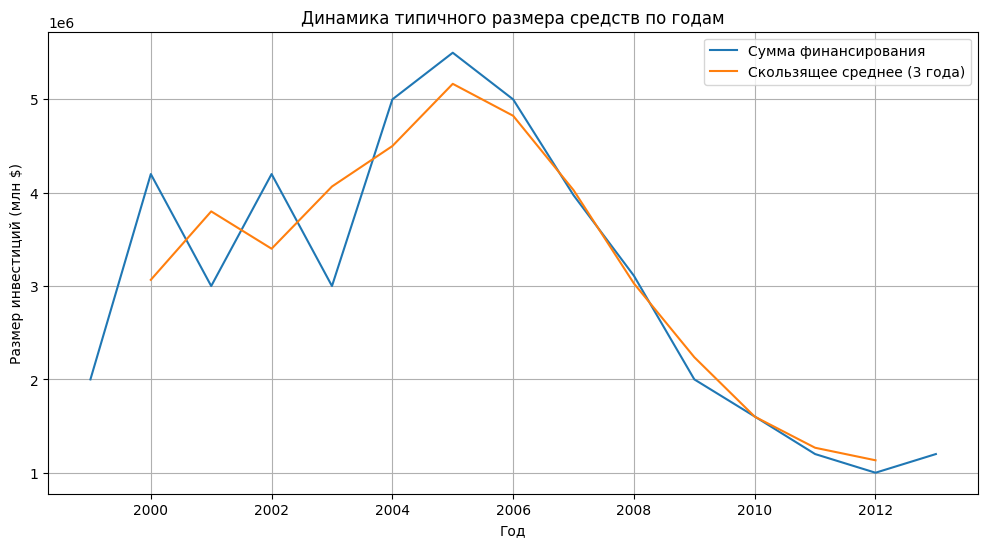

In [16]:
filtered_pivot['median_sma3'] = (
    filtered_pivot['median']
    .rolling(window=3, center=True)
    .mean()
)

ax = filtered_pivot.plot(
    kind='line',
    x='funded_at',
    y=['median', 'median_sma3'],
    figsize=(12,6),
    legend=True,
    grid=True,
    title='Динамика типичного размера средств по годам'
)

plt.xlabel('Год')
plt.ylabel('Размер инвестиций (млн $)')
plt.legend(['Сумма финансирования', 'Скользящее среднее (3 года)'])
plt.show()


Максимальный размер средств собранных в рамках одного раунда был зафиксирован в 2005 году - 5500000 (млн $)


В 2013 году тенденция на количество раундов увеличилась, этот год стал рекордным за всё время - 11072 раундов. Выделяемые средства выросли, по сравнению с прошлым годом и сравнялись с 2011 - 1200000(млн $)


### 2.2. Люди и их образование

Узнаем зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценить среднюю долю сотрудников без информации об образовании в каждой из групп.

In [43]:
degrees['object_id_clean'] = degrees['object_id'].str.replace('p:','').astype(float)

In [44]:
people_education = people.merge(education, left_on='id',right_on='person_id',how='outer')

education_info = people_education.merge(degrees, left_on='id_x', right_on='object_id_clean', how='outer')

In [46]:
education_info = education_info.drop(['network_username', 'object_id_clean', 'id_y', 'person_id', 'id', 'object_id',], axis=1)

In [47]:
numb_of_employees = education_info.groupby('company_id').agg({'id_x': 'nunique'}).reset_index().rename(columns={'id_x': 'num_employees'})

In [48]:
cut_labels = ['малые', 'средние', 'крупные', 'очень крупные']
cut_bins = [0, 2, 10, 50, 250]

numb_of_employees['company_category'] = pd.cut(numb_of_employees['num_employees'],
                       bins=cut_bins,
                       labels=cut_labels)
numb_of_employees.head()

,company_id,num_employees,company_category
0,1,2,малые
1,2,1,малые
2,3,3,средние
3,4,13,крупные
4,5,61,очень крупные


In [50]:
education_info['company_category'] = numb_of_employees['company_category']

In [51]:
education_info.groupby('company_category')['id_x'].count()

/tmp/ipython-input-2328296858.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_info.groupby('company_category')['id_x'].count()


,id_x
company_category,
малые,20752
средние,1972
крупные,109
очень крупные,9


In [52]:
def degree_check(x):
    """
    Функция для проверки образования у сотрудников.
    0 - образование отсутствует, 1 - образование присутствует.
    """
    if x:
        return 0
    else:
        return 1

education_info['degree'] = education_info['degree_type'].isna().apply(degree_check)

education_info.head()

,id_x,first_name,last_name,company_id,instituition,graduated_at,degree_type,subject,company_category,degree
0,2.0,Ben,Elowitz,4993,"University of California, Berkeley",1994-01-01,BS,Electrical Engineering/Computer Science,малые,1
1,2.0,Ben,Elowitz,4993,"University of California, Berkeley",1994-01-01,BS,Applied Mathematics,малые,1
2,2.0,Ben,Elowitz,4993,"University of California, Berkeley",1994-01-01,BS,Electrical Engineering/Computer Science,средние,1
3,2.0,Ben,Elowitz,4993,"University of California, Berkeley",1994-01-01,BS,Applied Mathematics,крупные,1
4,3.0,Kevin,Flaherty,1,Washington University in St Louis,NaT,BBA,NaN,очень крупные,1


In [53]:
display(education_info.groupby('company_category')['degree'].mean())

display(1 - education_info.groupby('company_category')['degree'].mean())

/tmp/ipython-input-2570104732.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(education_info.groupby('company_category')['degree'].mean())


,degree
company_category,
малые,0.561606
средние,0.604757
крупные,0.639640
очень крупные,0.777778


/tmp/ipython-input-2570104732.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(1 - education_info.groupby('company_category')['degree'].mean())


,degree
company_category,
малые,0.438394
средние,0.395243
крупные,0.360360
очень крупные,0.222222


**Средняя доля сотрудников с информацией об образовании по категории компании**:

- малые - 43%
- средние - 46%
- крупные - 44%
- очень крупные - 22%

**Средняя доля сотрудников без информации об образовании по категории компании**:

- малые - 57%
- средние - 54%
- крупные - 56%
- очень крупные - 78%

Границы групп были сделаны исходя из распределения количества сотрудников:

Видно, что преобладают компании с 1-2 сотрудниками, их можно отнести к категории «малые».

Количество сотрудников в компаниях от 3 до 10 человек также немалое, они подойдут для категории «средние».

Компаний от 10 до 50 человек заметно меньше, по сравнению с предыдущими категориями, их отнесём в «крупные» компании.

Остальная часть компаний получат категорию «очень крупные», их всего лишь 9.

### 2.3. Объединять или не объединять

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [54]:
company_and_rounds[company_and_rounds['network_username'].notnull()]

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,5,888,1,2005-10-01,series-a,5250000,0,2,0,1
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,5,889,1,2007-01-01,series-b,9500000,0,3,0,0
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,5,2312,1,2008-05-19,series-c+,25000000,0,4,1,0
9,100042,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0,...,1,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
11,100062,Vetter Idea Management System,enterprise,operating,2011-08-01,NaT,getvetter.com,getvetter,NaN,0,...,1,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217467,7748,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0,...,3,2836,7748,2008-01-31,angel,1300000,0,8,1,1
217468,174536,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0,...,0,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
217469,43233,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0,...,3,12687,43233,2010-03-05,angel,500000,0,2,0,1
217470,43233,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0,...,3,21259,43233,2011-02-02,series-a,7000000,0,5,0,0


In [55]:
people[(people['network_username'].notnull()) & (people['company_id'] == 1)]

,id,first_name,last_name,company_id,network_username
3834,104800,Alex,Weinstein,1,alexweinstein


In [56]:
people[(people['network_username'].notnull()) & (people['company_id'] == 100042)]

,id,first_name,last_name,company_id,network_username


In [57]:
people[(people['network_username'].notnull()) & (people['company_id'] == 43233)]

,id,first_name,last_name,company_id,network_username
3249,104035,Jessica,Zollman,43233,jayzombie
183720,54033,Kevin,Systrom,43233,KEVIN


Столбец `network_username` не подходит для объединения, так как в разных датасетах столбец отвечает за разные данные:

**company_and_rounds.csv**:

`network username` — ник компании в сети.

**people.csv**:

`network_username` — ник в социальных сетях.

**fund.csv**:

`network_username` — ник фонда в сети.

Это подтверждается запросами, которые были выполнены выше.

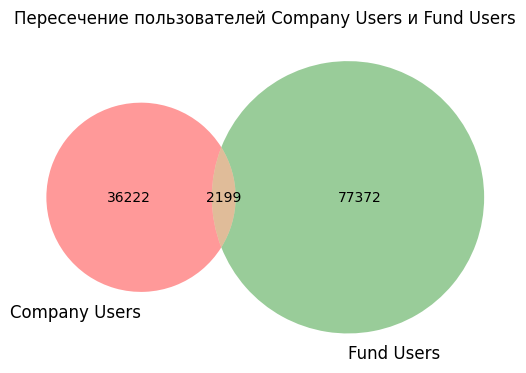

In [58]:
set_people = set(people['network_username'].dropna())
set_company = set(company_and_rounds['network_username'].dropna())

venn2([set_people, set_company], set_labels=('Company Users', 'Fund Users'))

plt.title('Пересечение пользователей Company Users и Fund Users')
plt.show()

При объеденении по `network_username` мы получим 2199 записей, но потеряем 36222 из таблицы `people` и 77372 записей из таблицы `company_and_rounds`.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом привести данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратить внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовить данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [59]:
company_and_rounds.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,5,888,1,2005-10-01,series-a,5250000,0,2,0,1
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,5,889,1,2007-01-01,series-b,9500000,0,3,0,0
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,5,2312,1,2008-05-19,series-c+,25000000,0,4,1,0
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,...,0,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,...,4,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>


In [60]:
company_summary = company_and_rounds.groupby('company_ID')  \
    .agg(name=('name', 'first'),
         category=('category_code', 'first'),
         status=('status', 'first'),
         founded_at=('founded_at', 'first'),
         closed_at=('closed_at', 'first'),
         country=('country_code', 'first'),
         total_rounds=('funding_round_id', 'count'),
         total_raised=('raised_amount', 'sum')
).reset_index()

company_summary.head()

,company_ID,name,category,status,founded_at,closed_at,country,total_rounds,total_raised
0,1,Wetpaint,web,operating,2005-10-17,NaT,USA,3,39750000
1,2,AdventNet,enterprise,operating,1996-01-01,NaT,USA,0,0
2,3,Zoho,software,operating,2005-09-15,NaT,USA,0,0
3,4,Digg,news,acquired,2004-10-11,NaT,USA,4,45000000
4,5,Socialnet,social,ipo,2004-02-01,NaT,USA,11,2425700000



## Шаг 3. Исследовательский анализ объединённых таблиц


### 3.1. Объединение данных

Объединить данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы взять данные из обработанного датасета `company_and_rounds.csv` — выбрать только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверить полноту и корректность получившейся таблицы. Далее работать только с этими данными.

In [61]:
companies = company_and_rounds.groupby('company_ID') \
    .agg(name=('name', 'first'),
         category=('category_code', 'first'),
         status=('status', 'first'),
         investment_rounds=('investment_rounds', 'first'),
         fonded_at=('founded_at', 'first'),
         closed_at=('closed_at', 'first'),
         country_code=('country_code', 'first')
).reset_index()

companies.head()

,company_ID,name,category,status,investment_rounds,fonded_at,closed_at,country_code
0,1,Wetpaint,web,operating,0,2005-10-17,NaT,USA
1,2,AdventNet,enterprise,operating,0,1996-01-01,NaT,USA
2,3,Zoho,software,operating,0,2005-09-15,NaT,USA
3,4,Digg,news,acquired,0,2004-10-11,NaT,USA
4,5,Socialnet,social,ipo,3,2004-02-01,NaT,USA


In [62]:
rounds_info = company_and_rounds.groupby('company_ID') \
    .agg(pre_money_valuation=('pre_money_valuation', 'first'),
         funding_round_type=('funding_round_type', 'first'),
         is_first_round=('is_first_round', 'first'),
         total_rounds=('funding_round_id', 'count'),
         total_raised=('raised_amount', 'sum')
).reset_index()

rounds_info.head()

,company_ID,pre_money_valuation,funding_round_type,is_first_round,total_rounds,total_raised
0,1,0,series-a,0,3,39750000
1,2,<NA>,None,<NA>,0,0
2,3,<NA>,None,<NA>,0,0
3,4,0,series-b,0,4,45000000
4,5,0,angel,0,11,2425700000


In [63]:
company_final = companies.merge(rounds_info, on='company_ID', how='left')

company_final.head()

,company_ID,name,category,status,investment_rounds,fonded_at,closed_at,country_code,pre_money_valuation,funding_round_type,is_first_round,total_rounds,total_raised
0,1,Wetpaint,web,operating,0,2005-10-17,NaT,USA,0,series-a,0,3,39750000
1,2,AdventNet,enterprise,operating,0,1996-01-01,NaT,USA,<NA>,None,<NA>,0,0
2,3,Zoho,software,operating,0,2005-09-15,NaT,USA,<NA>,None,<NA>,0,0
3,4,Digg,news,acquired,0,2004-10-11,NaT,USA,0,series-b,0,4,45000000
4,5,Socialnet,social,ipo,3,2004-02-01,NaT,USA,0,angel,0,11,2425700000


In [64]:
company_final_filtered = company_final[((company_final['total_rounds'] > 0) |
                                       (company_final['investment_rounds'] > 0)) |
                                       (company_final['status'] == 'acquired')]

company_final_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40747 entries, 0 to 196552
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_ID           40747 non-null  Int64         
 1   name                 40747 non-null  object        
 2   category             35315 non-null  object        
 3   status               40747 non-null  object        
 4   investment_rounds    40747 non-null  Int64         
 5   fonded_at            27807 non-null  datetime64[ns]
 6   closed_at            2128 non-null   datetime64[ns]
 7   country_code         34742 non-null  object        
 8   pre_money_valuation  31707 non-null  Int64         
 9   funding_round_type   31707 non-null  object        
 10  is_first_round       31707 non-null  Int64         
 11  total_rounds         40747 non-null  Int64         
 12  total_raised         40747 non-null  Int64         
dtypes: Int64(6), datetime64[ns](2), obj


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оценить, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратить внимание, например, на показатели, возвращаемые методом `.describe()`, — объяснить их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [ ]:
company_final_filtered['total_raised'].describe()

count            40747.0
mean     10135609.654821
std      56464362.377884
min                  0.0
25%                  0.0
50%             600000.0
75%            5650650.0
max         5700000000.0
Name: total_raised, dtype: Float64

Минимальное значение - 0 $

Максимальное значение - 5 700 000 000 (млрд $)

Среднее значение - 10 135 610 (млн $)

Медиана - 600 000 (тыс $)

Стандартное отклонение - 56 464 360 (млн $)

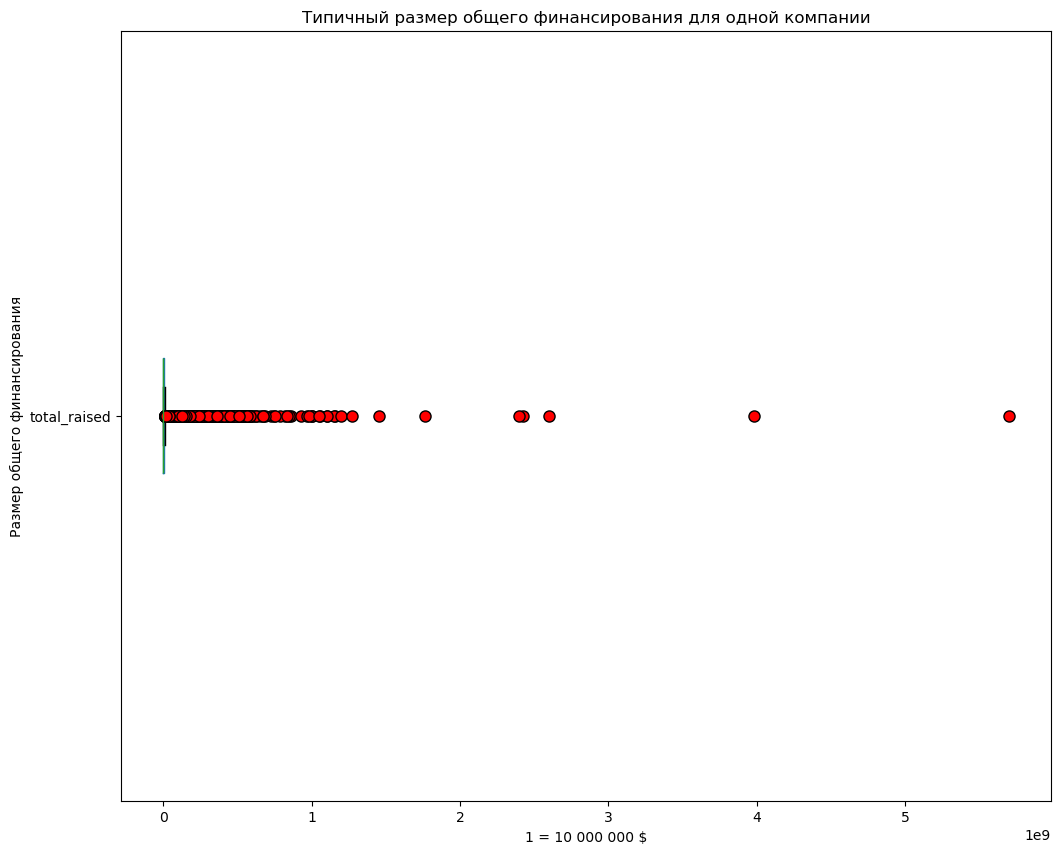

In [ ]:
company_final_filtered.boxplot(column='total_raised',
             grid=False,
             vert=False,
             figsize=(12,10),
             flierprops={'marker': 'o',
                         'markerfacecolor': 'red',
                         'markeredgecolor': 'black',
                         'markersize': 8,
                         'linestyle': 'none'})

plt.xlabel('1 = 10 000 000 $')
plt.ylabel('Размер общего финансирования')
plt.title('Типичный размер общего финансирования для одной компании')
plt.show()

Выбросы отмечены красными точками.

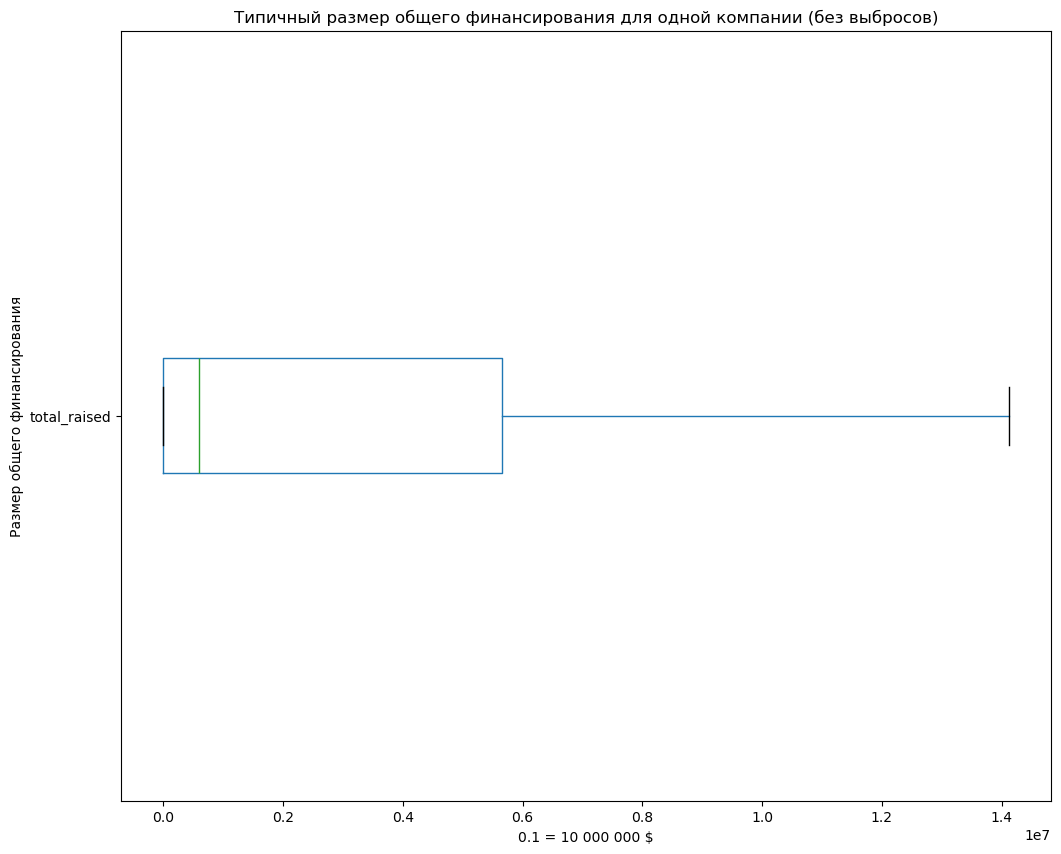

In [ ]:
company_final_filtered.boxplot(column='total_raised',
             showfliers=False,
             grid=False,
             vert=False,
             figsize=(12,10),
             flierprops={'marker': 'o',
                         'markerfacecolor': 'red',
                         'markeredgecolor': 'black',
                         'markersize': 8,
                         'linestyle': 'none'})

plt.xlabel('0.1 = 10 000 000 $')
plt.ylabel('Размер общего финансирования')
plt.title('Типичный размер общего финансирования для одной компании (без выбросов)')
plt.show()

Q1 = 0

Q3 = 5 650 650

IQR = Q3 - Q1 = 5 650 650

Границы выбросов:

Нижняя: Q1 - 1.5 * IQR = −8 475 975 --> 0

Верхняя: Q3 + 1.5 * IQR = 14 126 625

Видно, что распределение сильно скошено вправо, то есть имеет хвост.

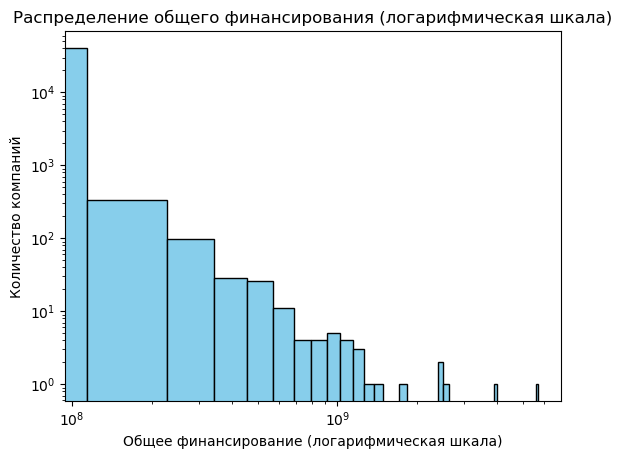

In [ ]:
plt.hist(company_final_filtered['total_raised'], bins=50, color='skyblue', edgecolor='black', log=True)
plt.xscale('log')
plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний')
plt.title('Распределение общего финансирования (логарифмическая шкала)')
plt.show()


### 3.3. Куплены забесплатно?

- Исследовать компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитать аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и указать, каким процентилям границы соответствуют.

In [ ]:
sold_for_nothing = company_final_filtered[((company_final_filtered['pre_money_valuation'] == 0) |
                                           (company_final_filtered['pre_money_valuation'] == 1)) &
                                          (company_final_filtered['total_raised'] > 0)
]

sold_for_nothing.head()

,company_ID,name,category,status,investment_rounds,fonded_at,closed_at,country_code,pre_money_valuation,funding_round_type,is_first_round,total_rounds,total_raised
0,1,Wetpaint,web,operating,0,2005-10-17,NaT,USA,0,series-a,0,3,39750000
3,4,Digg,news,acquired,0,2004-10-11,NaT,USA,0,series-b,0,4,45000000
4,5,Socialnet,social,ipo,3,2004-02-01,NaT,USA,0,angel,0,11,2425700000
5,7,Omnidrive,network_hosting,closed,0,2005-11-01,2008-09-15,ISR,0,angel,1,1,800000
11,13,StumbleUpon,web,acquired,0,2002-02-01,NaT,USA,0,series-a,0,4,18500000


In [ ]:
sold_for_nothing['total_raised'].describe()

count            27863.0
mean     14764161.077163
std      67395166.259925
min                291.0
25%             500000.0
50%            2563170.0
75%           11000000.0
max         5700000000.0
Name: total_raised, dtype: Float64

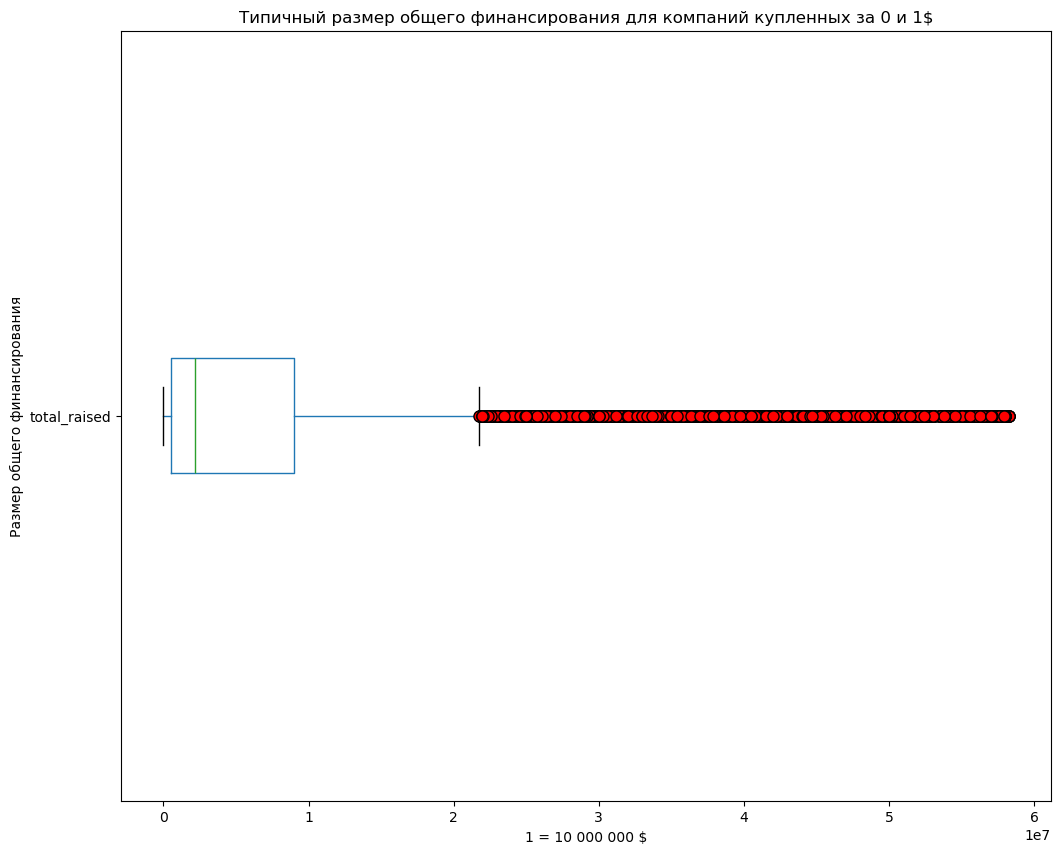

In [ ]:
q_95_sold_for_nothing = sold_for_nothing['total_raised'].quantile(0.95)

sold_for_nothing[sold_for_nothing['total_raised'] <= q_95_sold_for_nothing] \
    .boxplot(column='total_raised',
             grid=False,
             vert=False,
             figsize=(12,10),
             flierprops={'marker': 'o',
                         'markerfacecolor': 'red',
                         'markeredgecolor': 'black',
                         'markersize': 8,
                         'linestyle': 'none'})

plt.xlabel('1 = 10 000 000 $')
plt.ylabel('Размер общего финансирования')
plt.title('Типичный размер общего финансирования для компаний купленных за 0 и 1$')
plt.show()

Q1 = 500 000

Q3 = 11 000 000

IQR = Q3 - Q1 = 10 500 000


Границы выбросов:

Нижняя: Q1 - 1.5 * IQR = -15 250 000 --> 0

Верхняя: Q3 + 1.5 * IQR = 26 750 000

Как и на прошлой диаграмме, видно, что распределение сильно скошено вправо, то есть имеет хвост. Выбросы отмечены красными точками.

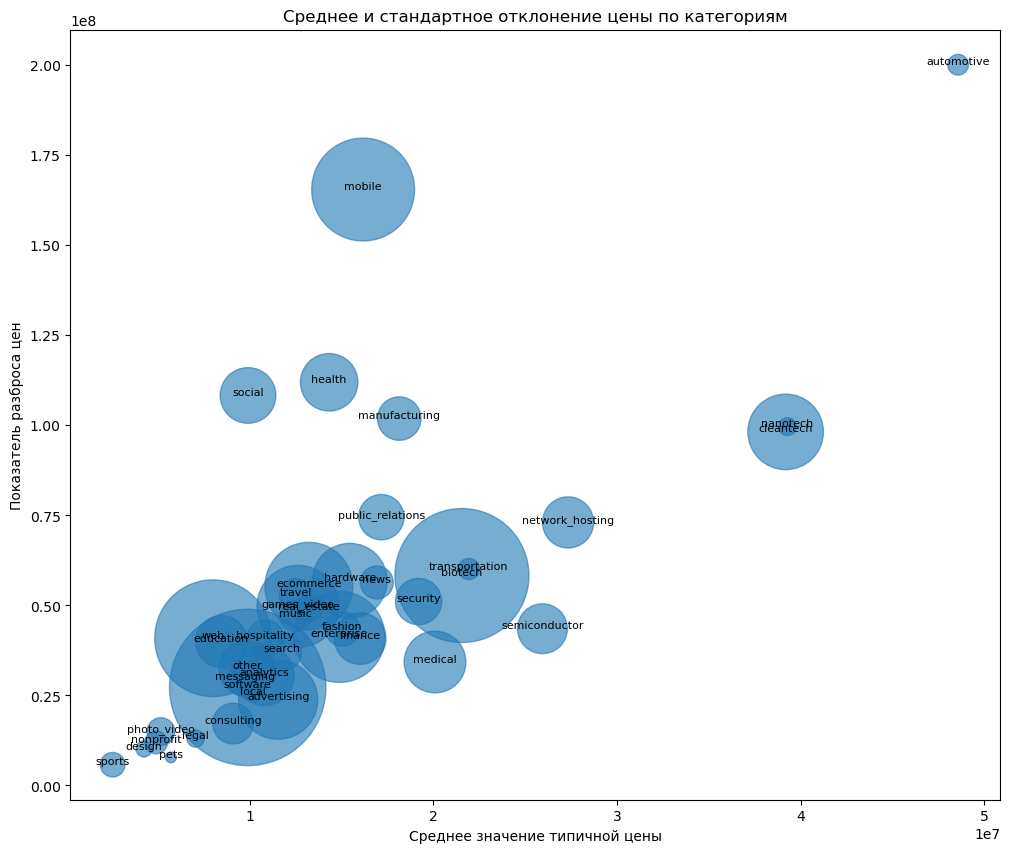

In [ ]:
stats = (sold_for_nothing.groupby('category')['total_raised']
      .agg(['mean', 'std', 'count'])
      .reset_index())

stats_filtered = stats[stats['count'] >= 10]

plt.figure(figsize=(12,10))

scatter = plt.scatter(stats_filtered['mean'],
                      stats_filtered['std'],
                      s=stats_filtered['count'] * 3,
                      alpha=0.6
)

for _, row in stats_filtered.iterrows():
    plt.text(row['mean'], row['std'], row['category'], fontsize=8, ha='center')

plt.xlabel('Среднее значение типичной цены')
plt.ylabel('Показатель разброса цен')
plt.title('Среднее и стандартное отклонение цены по категориям')
plt.show()


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделить категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объяснить, почему составлен топ именно из такого числа категорий и почему рассчет именно такой.

In [ ]:
acquisition_filtered = acquisition[acquisition['price_amount'] > 0]

categories = pd.merge(
    acquisition_filtered,
    companies[['company_ID', 'name', 'category']],
    left_on='acquired_company_id',
    right_on='company_ID',
    how='inner'
)

category_stats = categories.groupby('category')['price_amount'].agg([
    'median',
    'std',
    'count'
]).reset_index()

category_stats['std'] = category_stats['std'].fillna(0)
category_stats['var'] = category_stats['std'] ** 2

category_stats_filtered = category_stats[category_stats['count'] >= 10]

category_stats_filtered.head()

,category,median,std,count,var
0,advertising,60000000.0,4.954839e+08,84,2.455043e+17
3,biotech,200000000.0,1.968195e+09,263,3.873793e+18
4,cleantech,185000000.0,8.744196e+08,39,7.646097e+17
5,consulting,32150000.0,1.018109e+09,32,1.036546e+18
6,ecommerce,157500000.0,2.814255e+08,50,7.920034e+16


Основная мысль была в том, чтобы исключить у категорий случайные большие сделки. Для этого была проведена фильтрация чтобы число сделок было больше 10, это позволило выделить нужные категории.

Категория `biotech` является лидером с большим отрывом.


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследовать значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Построить график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделать выводы.

In [ ]:
company_final_filtered['status'].unique()

array(['operating', 'acquired', 'ipo', 'closed'], dtype=object)

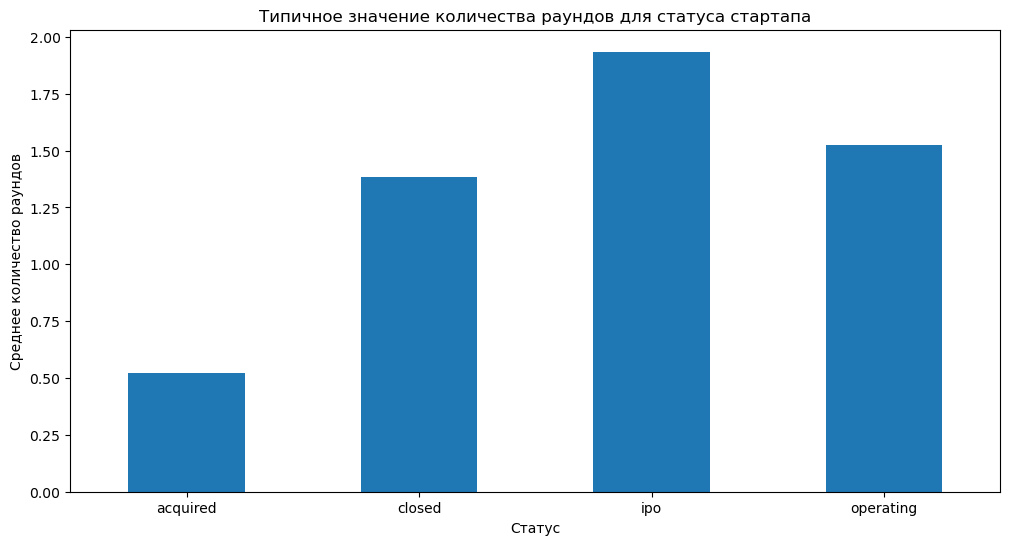

In [ ]:
company_final_filtered.groupby('status')['total_rounds'].mean() \
    .plot(kind='bar',
          rot=0,
          legend=False,
          title='Типичное значение количества раундов для статуса стартапа',
          figsize=(12,6)
)

plt.xlabel('Статус')
plt.ylabel('Среднее количество раундов')

plt.show()

acquired - стартап был куплен. Значение среднего количества раундов: от 0 до 1.

closed - стартап был закрыт. Значение среднего количества раундов: от 1 до 2.

ipo - стартап вышел на биржу. Значение среднего количества раундов: от 2 до 3.

operating - стартап продолжает работать. Значение среднего количества раундов: от 1 до 2.

/var/folders/74/lf899gys6vj5lxlvb5wptdpw0000gn/T/ipykernel_2283/1565010420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_final_filtered['acquired_flag'] = company_final_filtered['status'] == 'acquired'


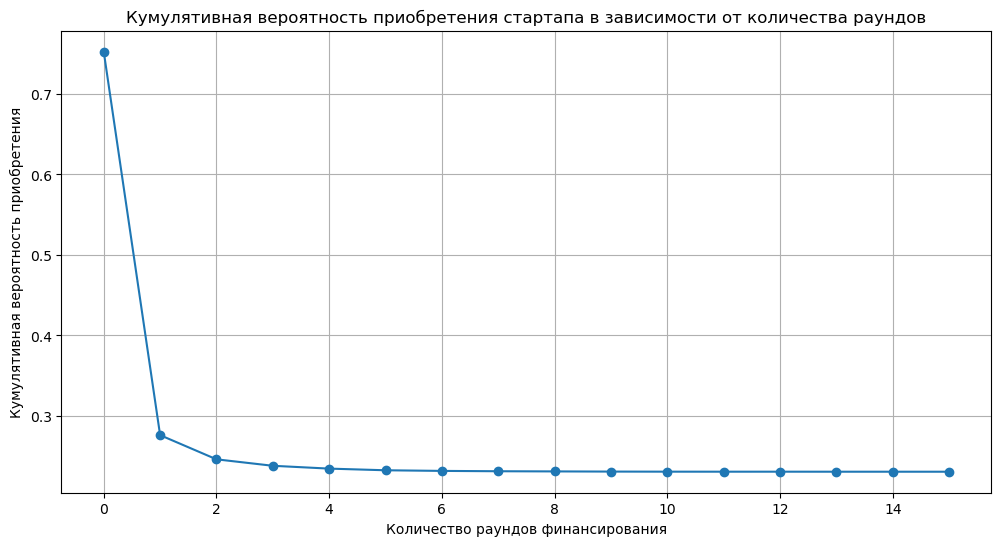

In [ ]:
company_final_filtered['acquired_flag'] = company_final_filtered['status'] == 'acquired'

round_counts = company_final_filtered.groupby('total_rounds')['acquired_flag'].agg(['sum', 'count']).reset_index()
round_counts['cumulative_acquired'] = round_counts['sum'].cumsum()
round_counts['cumulative_total'] = round_counts['count'].cumsum()

round_counts['cumulative_prob'] = round_counts['cumulative_acquired'] / round_counts['cumulative_total']

plt.figure(figsize=(12,6))
plt.plot(round_counts['total_rounds'], round_counts['cumulative_prob'], marker='o')
plt.title('Кумулятивная вероятность приобретения стартапа в зависимости от количества раундов')
plt.xlabel('Количество раундов финансирования')
plt.ylabel('Кумулятивная вероятность приобретения')
plt.grid(True)
plt.show()


### Промежуточный вывод

Был создан датасет с данными, с помощью двух таблиц `companies` и `rounds_info`. В одной содержится информация о компании, в другой о раундах. Предварительно была сделана фильтрация - только те компании, у которых значения столбца `total_rounds` в таблице `company_final` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице получилось 40747 строк и 12 столбцов.

Проанализирован, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся. Построен boxplot, с описанием необходимых данных.

Исследованы компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования. Также был построен boxplot с необходимыми данными.

Выделены категории стартапов, которые могут заинтересовать крупных инвесторов, то есть характеризующиеся:
- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Построен график, отражающий типичное значение количества раундов для каждого возможного статуса стартапа.


## Шаг 4. Итоговый вывод и рекомендации

Описать, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

### Общий обзор проделанной работы.

В ходе исследования были проанализированы несколько датасетов включающие в себя информацию о компаниях, раундах финансирования, покупках, сотрудниках, образовании и фондах.

Данные представлены несколькими таблицами:

`acquisition` - состоит из 9407 строк и 6 столбцов. Содержит информацию о покупках одними компаниями других компаний.

`company_and_rounds` - состоит из 217774 строк и 22 столбцов. Содержит информацию о компаниях и раундах финансирования.

`people` - состоит из 226709 строк и 5 столбцов. Содержит информацию о сотрудниках.

`education` - состоит из 109610 строк и 4 столбцов. Содержит информацию об образовании сотрудника.

`degrees` - состоит из 109610 строк и 5 столбцов. Содержит информацию о типе образования сотрудника.

`fund` - состоит из 11652 строк и 9 столбцов. Содержит информацию о фондах.

`investment` - состоит из 61403 строк и 4 столбцов. Содержит информацию о раундах инвестирования.

Цель исследования, которая было поставлена - подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.



### Ответы на исследовательские вопросы

1. Раунды финансирования по годам:   

Типичный размер средств, выделяемый в рамках одного раунда за всё время, варьируется от 1 000 000 до 5 500 000 (млн $).  
Минимум был зафиксирован в 2012, а максимум - в 2005.

Общее количество раундов финансирования за 2013 год - 11 072, это самый высокий результат за всё время (с 1999 по 2012).  
Самый низкий результат был в 1999 - 76.

2. Люди и их образование:

В очень крупных компаниях полнота сведений о сотрудниках равна 22%, тогда как в других категориях - от 43 до 46%.  

Количество компаний по категориям:

Малые - 20 826  

Средние - 1 976  

Крупные - 111  

Очень крупные - 9  



3. Объединение данных:

Рассматривались компании, у которых общее количество раундов больше 0 или они имеют статус `acquired` (то есть стартап был куплен).  

Типичный размер общего финансирования для одной компании составляет 10 724 930 (млн $), а выбивающимся считается всё, что больше 15 728 615 (млн ).


4. Цены стартапов по категориям:

Среди категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен можно выделить:

- advertising

- biotech

- cleantech

- consulting

- ecommerce

5. Сколько раундов продержится стартап перед покупкой:

Типичное значение количества раундов для каждого возможного статуса стартапа:

acquired - стартап был куплен. Значение среднего количества раундов: от 0 до 1.

closed - стартап был закрыт. Значение среднего количества раундов: от 1 до 2.

ipo - стартап вышел на биржу. Значение среднего количества раундов: от 2 до 3.

operating - стартап продолжает работать. Значение среднего количества раундов: от 1 до 2.

### Рекомендации

1. Работа с финансированием стартапов

* Для инвесторов стоит обращать внимание на стартапы, привлёкшие несколько раундов финансирования, особенно на ранних этапах (1-2 раунда), так как вероятность приобретения или успешного развития выше на этом этапе.
* Категории `advertising`, `biotech`, `cleantech`, `consulting` и `ecommerce` выделяются высокими ценами и значительным разбросом, что делает их привлекательными для инвесторов, готовых к риску ради высокой доходности.

2. Оценка персонала и образования

* Неполнота данных о сотрудниках особенно в крупных компаниях (22% заполненности) требует осторожности при оценке человеческого капитала.
* Для анализа влияния команды на успех стартапа рекомендуется использовать объединённые данные из нескольких источников и периодически обновлять их.

3. Практическое применение

* Данные могут использоваться для сегментации стартапов по вероятности приобретения, что поможет инвесторам строить портфели и определять целевые категории для вложений.
* Кумулятивный анализ количества раундов позволяет определить оптимальные точки для приобретения стартапа, а также понять, на каких стадиях стартапы наиболее уязвимы или успешны.
* Для бизнеса и исследователей рекомендуется регулярно обновлять данные и проверять их на актуальность, чтобы поддерживать точность прогнозов и аналитики.




### Общая оценка
Полученные результаты подтверждают, что данные позволяют выявить ключевые закономерности. Но неполнота в некоторых данных заставляет с осторожностью принимать выводы: они скорее дают общую картину, чем точные значения.  

Таким образом, исследование достигло поставленной цели: был подготовлен рабочий датасет, проверен его смысл и даны предварительные ответы на вопросы заказчика.

---